# Leçon 2.2 Les querelles de données programmatiques avec Python et Pandas

<div class="alert alert-block alert-warning">
    <b>A la fin de la formation, vous pourrez:</b>
    <br>
    <ul>
        <li>Intégrer et appliquer les méthodes des bibliothèques d'analyse de données de base de Numpy, Pandas et Matplotlib pour étudier et manipuler les données sources.</li>
    </ul>
</div>

## 2.2.1 Enquêter et manipuler les données avec les pandas

Ce serait bien si vous pouviez importer des données désordonnées et avoir un programme qui les restructure automatiquement pour vous dans le schéma de métadonnées que vous avez choisi. Il n'existe actuellement aucun mécanisme pour ce faire, et les querelles de programme sur les données ne réduisent la complexité du processus que de façon limitée. Ce qu'il fait, c'est réduire les tâches répétitives, comme le copier-coller, et limiter massivement le risque d'introduire des erreurs liées à la copie.

### Configurer votre environnement de développement et installer des paquets tiers

Python est un langage de programmation. Au cœur de ce langage se trouvent les fonctions et les définitions que vous avez apprises dans la leçon 1.2.1. Cependant, Python est aussi une communauté de développeurs passionnés - tout comme vous - qui apportent chacun au langage de programmation leur intérêt particulier. Il peut s'agir de résoudre des mathématiques complexes, ou de dessiner des graphiques et des visualisations saisissantes, de créer des jeux informatiques, ou même de travailler avec des données structurées. Ce faisant, ils créent de nouvelles fonctions qu'ils peuvent regrouper sous forme de bibliothèques pour les mettre à la disposition des autres. La communauté Pyton a produit des dizaines de milliers de ces paquets, et nous allons en installer certains maintenant.

Si vous ne l'avez pas encore fait, lancez votre Anaconda Navigator : 

![Jupyter menu (base)](images/jupyter-home-base.jpg)

Sélectionnez Environnements dans le menu de gauche :

![Jupyter menu](images/jupyter-menu.jpg)

Anaconda vous permet de créer des environnements de développement isolés. L'important est de comprendre qu'il conserve votre logiciel de programmation dans sa propre "zone de jeu", ce qui le rend facile à étendre et à supprimer. Créez un nouvel environnement en cliquant sur le bouton "Create" au bas de l'écran : 

![Jupyter environments](images/jupyter-environments.JPG "Jupyter environments")

Donnez à votre environnement le nom que vous voulez, mais vous pouvez l'appeler `datascience` pour qu'il soit facile à trouver. Maintenant, vous devez installer les paquets dont nous avons besoin pendant ce cours. Il y a deux façons de le faire, l'une pour les paquets que Conda connaît déjà, et l'autre à partir du terminal du système d'exploitation. Nous allons maintenant faire la seconde qui nous permettra d'installer tout ce dont nous avons besoin.

Faites un clic gauche sur la "flèche" à côté de `datascience` et choisissez `Open Terminal`. Assurez-vous que vous cliquez sur le bon environnement ; pas sur `base` ou`root`, mais sur le nom de l'environnement que vous venez de créer : 

![Jupyter terminal](images/jupyter-terminal.JPG "Jupyter terminal")

Une nouvelle fenêtre s'ouvrira avec une invite de commande. Tapez ce qui suit et entrez.

    pip install whyqd
    
![Jupyter terminal window](images/jupyter-terminal-window.JPG "Jupyter terminal window")
  
[Whyqd](https://github.com/whythawk/whyqd/) comporte des dépendances que nous utiliserons lors des prochaines leçons, dont [Pandas](https://pandas.pydata.org/pandas-docs/stable/), qui seront également installées automatiquement. Nous n'utiliserons pas `whyqd` avant la prochaine leçon, mais c'est un bon moment pour s'assurer que nous l'avons. Faites maintenant la même chose pour `matplotlib`, une bibliothèque de graphiques :

    pip install matplotlib
    
Une fois l'installation terminée (et il se peut que vous deviez répondre "oui" à l'invite), retournez à la page d'accueil et cliquez sur pour installer Jupyter Notebook.

![Jupyter module launcher](images/jupyter-datascience-home.JPG "Jupyter Module Launcher")

Une fois installé, lancez-le : 

![Jupyter launch](images/jupyter-launch.JPG "Launch Jupyter Notebook")

Vous devrez lancer Jupyter Notebook chaque fois que vous voudrez faire un tutoriel ou modifier vos carnets. Heureusement, Anaconda crée un raccourci Windows pour que vous puissiez le trouver facilement :

![Jupyter Windows launcher](images/jupyter-windows-launcher.JPG "Jupyter Windows launcher")

Si vous êtes bloqué, [lisez les documents](https://docs.anaconda.com/) ou cherchez des solutions sur [Stack Overflow](https://stackoverflow.com/).

Il existe une multitude de tutoriels et de ressources en ligne qui vous permettront d'approfondir les sujets abordés dans cette leçon, et vous pourrez probablement les trouver vous-même. La documentation des bibliothèques que nous utilisons est également une ressource essentielle et vous familiariser avec la façon de la lire et de l'utiliser vous rapportera énormément :
 
<div class="alert alert-block alert-info">
    <b>Références aux bibliothèques installées pour ce cours:</b>
    <br>
    <ul>
        <li><a href="https://docs.anaconda.com/">Anaconda</a></li>
        <li><a href="http://jupyter.org/documentation.html">Jupyter Notebook</a></li>
        <li><a href="https://pandas.pydata.org/pandas-docs/stable/">Pandas</a></li>
        <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/user/">Numpy</a></li>
        <li><a href="https://matplotlib.org/">Matplotlib</a></li>
        <li><a href="https://whyqd.readthedocs.io/en/latest/">Whyqd</a></li>
    </ul>
</div>

---

### Exemple de préparation de données

Travailler avec des données par programme signifie travailler de manière symbolique. La plupart du temps, vous ne regarderez pas les colonnes et les lignes de données comme vous le feriez dans un tableur. L'avantage est que vous n'imaginerez pas de modèles qui ne se trouvent pas dans les données, et que vous pouvez travailler avec de très grands ensembles de données. L'inconvénient est qu'il n'est pas toujours possible de savoir quand quelque chose va mal.

La première étape reste la nécessité que les données soient lisibles par la machine. Cela signifie que vous devez être bon dans les compétences présentées dans la première leçon. Le logiciel que nous allons utiliser ne peut pas ouvrir des fichiers qui ne sont pas préparés correctement.

Avant de pouvoir explorer les données, vous devez vous assurer qu'il y a une _ligne d'en-tête_ et qu'il n'y a _pas de colonnes ou de champs cachés_. Veuillez revoir la leçon 1.1 si vous n'êtes pas absolument sûr de ce que cela signifie.

Commençons à travailler avec le module que vous utiliserez et que vous apprendrez pour le reste de ce cours : `pandas`.

<div class="alert alert-block alert-info">
    <b>Syntaxe</b>
    <br>
    <ul>
        <li>Après avoir importé un module, <code>dir(module)</code> vous permet de voir une liste de toutes les fonctions implémentées dans cette bibliothèque.</li>
        <li>Vous pouvez également lire l'aide des chaînes de documentation du module avec <code>help(module)</code></li>
    </ul>
</div>

In [1]:
import pandas as pd
import numpy as np

help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

Nous `import` un module et pouvons le renommer en utilisant le terme `as` :

    import pandas as pd
    import numpy as np
    
Il n'y a rien de spécial avec `pd` ou `np`, c'est juste une convention, mais nous utiliserons ___beaucoup___ ces modules, donc raccourcir les pandas en pd et numpy en np rend la frappe légèrement plus facile. Nous allons maintenant importer le même fichier Excel que nous avons utilisé dans la leçon 1.1 et faire exactement le même tutoriel qu'auparavant, mais cette fois-ci en utilisant des `pandas` et des `numpy`.

Nous commençons par importer le fichier Excel. Dans les pandas, une feuille de calcul est appelée `dataframe`, ou `df` en abrégé.

In [2]:
source = "http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL?downloadformat=excel"
# read_excel est une fonction de pandas qui vous ouvrira un fichier Excel
# la "source" peut être n'importe où, soit dans un fichier local, soit dans une ressource en ligne distante
df = pd.read_excel(source)
# la tête imprimera les x premières lignes de la trame de données pour que nous puissions voir à quoi elle ressemble
df.head(5) 

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Last Updated Date,2020-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,43778.0,43819.0,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,NaN
4,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,6927764.0,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,NaN


Eh bien, c'est un problème, mais alors - si vous vous souvenez du tutoriel original - la ligne d'en-tête n'est pas dans la première rangée, elle est en fait dans la troisième. Réimportons notre fichier et assurons-nous d'ignorer les deux premières rangées :

In [3]:
df = pd.read_excel(source, header=3)
df.head(5) 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,43778.0,43819.0,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,NaN
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,6927764.0,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,NaN
2,Angola,AGO,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,...,13963065.0,14660282.0,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,NaN
3,Albania,ALB,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,...,1519519.0,1546929.0,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,NaN
4,Andorra,AND,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,...,75007.0,74305.0,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,NaN


Vous remarquez le `NaN` dans la colonne `2019` ? Le `NaN` est l'abréviation de `Not-a-Number`, et c'est la façon dont les pandas (et `numpy`, le logiciel sur lequel ils fonctionnent) gardent la trace de nombres indéfinis. Dans ce cas, cela signifie qu'il n'y a pas de chiffres disponibles pour certains pays pour cette année-là. Les pandas essaieront de deviner le format des colonnes pour vous, mais il arrive qu'ils se trompent. Vérifions et voyons ce qu'il en pense :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            258 non-null    float64
 5   1961            258 non-null    float64
 6   1962            258 non-null    float64
 7   1963            258 non-null    float64
 8   1964            258 non-null    float64
 9   1965            258 non-null    float64
 10  1966            258 non-null    float64
 11  1967            258 non-null    float64
 12  1968            258 non-null    float64
 13  1969            258 non-null    float64
 14  1970            258 non-null    float64
 15  1971            258 non-null    float64
 16  1972            258 non-null    float64
 17  1973            258 non-null    flo

`dtypes` nous indiquent les types de données pour chacune des colonnes. `object` est toute sorte de `string` ou de type de données qui ne correspond pas aux types de données numériques, catégorielles ou de date. `float64` signifie que ces valeurs sont considérées comme des nombres à virgule flottante de 64 bits.

<div class="alert alert-block alert-warning">
    <p>À partir de maintenant, je ne ferai référence à la documentation que pour chaque nouvelle fonction que j'introduirai sous forme de commentaire dans le code, avec un lien vers une ressource en ligne où vous pourrez trouver des informations supplémentaires. C'est une habitude de codage utile à prendre car vous pouvez parfois oublier exactement comment vous avez découvert cette solution ou cette référence.</p>
    <p>Par exemple, <code># https://stackoverflow.com/a/51794989</code> est une référence à <a href="https://stackoverflow.com">Stackoverflow</a> - un site de questions et réponses très populaire parmi les développeurs. Si vous visitez ce lien, vous obtiendrez une foule d'informations sur la ligne de code, ou la solution technique, qui suit. Certaines références, par exemple <code># Référence pour np.where https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html</code>, vous mèneront à la documentation du paquet.</p>
    <p>Prendre l'habitude de lire des documents de référence. Le développement de logiciels exige de la patience et vous serez toujours en train de chercher. Faire vos propres recherches fait de vous un bon codeur.</p>
</div>

La liste complète des colonnes peut être consultée sous forme de liste :

In [5]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

Le fichier est actuellement au format `large` et nous préférerions qu'il soit `long`, avec toutes les années qui s'écoulent le long de la trame de données. Pour ce faire, nous devons `pivot` notre cadre de données et créer une nouvelle colonne `année`. Pandas dispose d'une fonction appelée `melt` pour ce faire, mais nous devons d'abord obtenir les colonnes que nous voulons utiliser :

In [6]:
id_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
year_columns = set(df.columns).difference(set(id_columns))

# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df = pd.melt(df, id_vars=id_columns, value_vars=year_columns,
             var_name='Année', value_name='Valeur')
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Année,Valeur
0,Aruba,ABW,Urban population,SP.URB.TOTL,1982,30943.0
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,1982,2208967.0
2,Angola,AGO,Urban population,SP.URB.TOTL,1982,2382559.0
3,Albania,ALB,Urban population,SP.URB.TOTL,1982,954645.0
4,Andorra,AND,Urban population,SP.URB.TOTL,1982,36561.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    15840 non-null  object 
 1   Country Code    15840 non-null  object 
 2   Indicator Name  15840 non-null  object 
 3   Indicator Code  15840 non-null  object 
 4   Année           15840 non-null  object 
 5   Valeur          15291 non-null  float64
dtypes: float64(1), object(5)
memory usage: 742.6+ KB


`Année` est de type `object`. S'il est important de convertir cela en un type de date, alors il faudrait le faire. Cependant, le fichier convient parfaitement à nos besoins, nous pouvons donc l'enregistrer au format CSV :

In [8]:
destination = "data/lesson-programmatic/world-urban-population-data.csv"
# `index=False` signifie que nous n'allons pas garder cette colonne d'index - elle sera recréée lorsque nous ouvrirons le fichier à l'avenir
df.to_csv(destination, index=False)

Pandas peuvent faire bien plus que simplement déplacer des données. Vous pouvez aussi filtrer, trier et dessiner des graphiques :

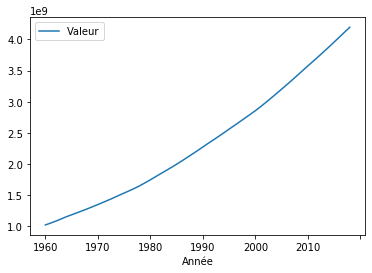

In [9]:
# importer la bibliothèque de graphiques dont nous avons besoin et la mettre en ligne avec le carnet
%matplotlib inline
# D'abord, triez par année pour vous assurer que tout est en ordre
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# inplace = True signifie qu'il va trier et enregistrer dans la variable df
df.sort_values(by="Année", inplace=True)
# Ici, nous filtrons la colonne df["Country Name"] uniquement par des valeurs == "World"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html
df[df["Country Name"] == "World"].plot(x="Année", y="Valeur")

## 2.2.2 Tutoriel - nettoyage de données complexes

La feuille de calcul sur laquelle vous avez travaillé dans le premier tutoriel avait des problèmes beaucoup plus complexes que le simple fait d'être large. Elle comporte des cellules fusionnées qui doivent être nettoyées. Bien sûr, vous pouvez le faire manuellement avant de l'importer dans les pandas, mais essayons de le réparer par programme.

Tout d'abord, n'oubliez pas que c'est à cela que ça ressemble :

![Feuille de calcul du tutoriel](images/tutorial-1-2.jpg)

In [10]:
import numpy as np
import pandas as pd

source = "data/lesson-spreadsheet/HDR 2007-2008 Table 03.xlsx"

df = pd.read_excel(source)
df.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Monitoring human development: enlarging people's choices …,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,3 Human and income poverty Developing countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Probability at birth of not surviving to age 4...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adult illiteracy rateb,†\n(% aged 15 and older...",...,HPI-1 rank minus income poverty rankc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Human poverty index (H...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comme dans l'exemple précédent, vous pouvez voir que la "vraie" ligne d'en-tête ne commence qu'aux alentours de la ligne 7, et même alors, elle apparaît étalée sur plusieurs lignes. De plus, il existe toute une série de problèmes différents. Voyez si vous pouvez tous les repérer :

- Colonnes et lignes apparemment vides (remplies de rien d'autre que des valeurs nulles `NaNs`)
- Caractères d'impression spéciaux (comme `\n`)
- Références qui n'ont probablement pas leur place dans ce tableur

Il y en aura d'autres, mais essayons de résoudre les problèmes immédiats.

In [11]:
# Repositionner la ligne d'en-tête
df = pd.read_excel(source, header=7)
# https://stackoverflow.com/a/51794989
# Supprimez d'abord toutes les colonnes (axe=1) sans valeurs
df = df.dropna(how="all", axis=1)
# Supprimer toutes les lignes (axe=0) sans valeurs
df = df.dropna(how="all", axis=0).reset_index(drop=True)
df.head(6)

,Unnamed: 0,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,Probability at birth of not surviving to age 4...,NaN,NaN,NaN,NaN,NaN,MDG,NaN,MDG,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adult illiteracy rateb,†\n(% aged 15 and older...",NaN,Population not using an improved water source†...,NaN,Children under weight for age†\n(% under age 5...,NaN,Population below\n income poverty line\n(%),NaN,NaN,NaN,NaN,NaN,HPI-1 rank minus income poverty rankc
2,NaN,NaN,Human poverty index (H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HDI rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$1 a day \n1990-2005d,NaN,$2 a day \n1990-2005d,NaN,National poverty line 1990-2004d,NaN,NaN
4,NaN,NaN,Rank,NaN,Value \n (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pourrions simplement fixer les colonnes, mais obtenons une liste des informations qui sont déjà là et utilisons cela pour guider les nouveaux noms que nous devons inclure.

In [12]:
columns = []
for c in df.columns:
    # Pour chaque colonne, obtenir les valeurs des 5 premières lignes
    # puis conservez toutes les chaînes (c'est-à-dire excluez-les si elles sont nulles) et ajoutez-les en colonne
    columns.append([str(v) for v in df[c][:5] if pd.notnull(v)])
columns

[['HDI rank'],
 [],
 ['Human poverty index                         (HPI-1)', 'Rank'],
 [],
 ['Value \n (%)'],
 ['Probability at birth of not surviving to age 40a,†\n(% of cohort)\n2000-05'],
 [],
 ['Adult illiteracy rateb,†\n(% aged 15 and older)\n1995-2005 '],
 [],
 ['Population not using an improved water source†\n(%)\n2004'],
 [],
 ['MDG', 'Children under weight for age†\n(% under age 5)\n1996-2005d '],
 [],
 ['MDG',
  'Population below\n income poverty line\n(%)',
  '$1 a day \n1990-2005d'],
 [],
 ['$2 a day \n1990-2005d '],
 [],
 ['National poverty line           1990-2004d'],
 [],
 ['HPI-1 rank minus income poverty rankc']]

Il y a quelques colonnes qui semblent ne pas avoir de noms. Mais ces colonnes n'ont pas été supprimées lorsque nous avons supprimé les colonnes et les lignes vides, il y a donc des informations dedans. En cas de doute, ouvrez le fichier source et jetez un coup d'œil. Vous constaterez alors que la première colonne "vide" contient en fait les noms des pays, et que les autres colonnes vides contiennent les références individuelles. Cela nous permet d'obtenir une liste de nouveaux noms de colonnes :

In [13]:
columns = [
    "HDI rank",
    "Country",
    "Human poverty index (HPI-1) - Rank",
    "Reference 1",
    "Human poverty index (HPI-1) - Value (%)",
    "Probability at birth of not surviving to age 40 (% of cohort) 2000-05",
    "Reference 2",
    "Adult illiteracy rate (% aged 15 and older) 1995-2005",
    "Reference 3",
    "Population not using an improved water source (%) 2004",
    "Reference 4",
    "Children under weight for age (% under age 5) 1996-2005",
    "Reference 5",
    "Population below income poverty line (%) - $1 a day 1990-2005",
    "Reference 6",
    "Population below income poverty line (%) - $2 a day 1990-2005",   
    "Reference 7",
    "Population below income poverty line (%) - National poverty line 1990-2004",   
    "Reference 8",
    "HPI-1 rank minus income poverty rank"
]
# Réinitialiser les colonnes des cadres de données
df.columns = columns
# Supprimer les lignes qui contenaient les informations dont nous n'avons plus besoin
# et réinitialiser l'index
# np.arange(5) crée un tableau = [0, 1, 2, 3, 4, 5]
df = df.drop(np.arange(5), axis=0).reset_index(drop=True)
df.head()

,HDI rank,Country,Human poverty index (HPI-1) - Rank,Reference 1,Human poverty index (HPI-1) - Value (%),Probability at birth of not surviving to age 40 (% of cohort) 2000-05,Reference 2,Adult illiteracy rate (% aged 15 and older) 1995-2005,Reference 3,Population not using an improved water source (%) 2004,Reference 4,Children under weight for age (% under age 5) 1996-2005,Reference 5,Population below income poverty line (%) - $1 a day 1990-2005,Reference 6,Population below income poverty line (%) - $2 a day 1990-2005,Reference 7,Population below income poverty line (%) - National poverty line 1990-2004,Reference 8,HPI-1 rank minus income poverty rank
0,HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,"Hong Kong, China (SAR)",..,NaN,..,1.5,e,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..
2,25,Singapore,7,NaN,5.2,1.8,NaN,7.5,NaN,0,NaN,3,NaN,..,NaN,..,NaN,..,NaN,..
3,26,Korea (Republic of),..,NaN,..,2.5,NaN,1.0,NaN,8,NaN,..,NaN,<2,NaN,<2,NaN,..,NaN,..
4,28,Cyprus,..,NaN,..,2.4,NaN,3.2,NaN,0,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..


Ce fichier n'est pas accompagné d'un fichier de métadonnées distinct. Toutes les références et notes de bas de page se trouvent littéralement au bas du fichier. Jetez un coup d'œil :

In [14]:
df.tail(30)

,HDI rank,Country,Human poverty index (HPI-1) - Rank,Reference 1,Human poverty index (HPI-1) - Value (%),Probability at birth of not surviving to age 40 (% of cohort) 2000-05,Reference 2,Adult illiteracy rate (% aged 15 and older) 1995-2005,Reference 3,Population not using an improved water source (%) 2004,Reference 4,Children under weight for age (% under age 5) 1996-2005,Reference 5,Population below income poverty line (%) - $1 a day 1990-2005,Reference 6,Population below income poverty line (%) - $2 a day 1990-2005,Reference 7,Population below income poverty line (%) - National poverty line 1990-2004,Reference 8,HPI-1 rank minus income poverty rank
127,176,Burkina Faso,106,NaN,55.8,26.5,NaN,76.4,NaN,39,NaN,38,NaN,27.2,NaN,71.8,NaN,46.4,NaN,23
128,177,Sierra Leone,102,NaN,51.7,45.6,NaN,65.2,NaN,43,NaN,27,NaN,57.0,e,74.5,e,70.2,NaN,4
129,NOTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,† Denotes indicators used to calculate the hum...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,a. Data refer to the probability at birth of n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,SOURCES\nColumn 1: Determined on the basis of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,HPI-1 ranks for 108 developing countries and a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,1,Barbados,22,Turkey,NaN,NaN,45,Tunisia,NaN,68,Morocco,NaN,NaN,89,Angola,NaN,NaN,NaN,NaN,NaN
135,2,Uruguay,23,Brazil,NaN,NaN,46,Nicaragua,NaN,69,Sudan,NaN,NaN,90,Papua New Guinea,NaN,NaN,NaN,NaN,NaN
136,3,Chile,24,Thailand,NaN,NaN,47,Indonesia,NaN,70,Lao People's Democratic Republic,NaN,NaN,91,Zimbabwe,NaN,NaN,NaN,NaN,NaN


Nous devons supprimer cette information du cadre de données ___mais___ nous ne pouvons pas la perdre. Vous devez également créer un fichier de métadonnées contenant ces informations à conserver avec votre fichier de données restructuré, de cette façon vous avez toutes les indications dont un utilisateur peut avoir besoin, ainsi que des données lisibles par machine.

In [15]:
# Déposer les lignes du bas des données que nous voulons conserver, jusqu'à la fin (défini comme len(df))
df = df.drop(np.arange(126,len(df)), axis=0).reset_index(drop=True)

Nous avons également un autre problème. Il existe trois catégories d'indice de développement humain, définies arbitrairement comme suit:

- `LOW HUMAN DEVELOPMENT` pour `HDI ranks < 155`
- `MEDIUM HUMAN DEVELOPMENT` pour `HDI ranks < 70`
- `HIGH HUMAN DEVELOPMENT` pour tout le reste

Nous devons supprimer ces lignes (car elles gênent les données de base) et les réaffecter à des colonnes.

In [16]:
hdi_categories = ["HIGH HUMAN DEVELOPMENT", "MEDIUM HUMAN DEVELOPMENT", "LOW HUMAN DEVELOPMENT"]
# Se débarrasser des rangées avec les catégories HDI
# https://stackoverflow.com/a/27360130 & https://stackoverflow.com/a/12098586
df = df.drop(df[df["HDI rank"].isin(hdi_categories)].index, axis=0).reset_index(drop=True)
# Référence pour np.where https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
# Pensez que cela ressemble à une déclaration du type "if" : where(test est vrai, vrai-quelque chose, faux-quelque chose)
# ceci peut aussi être imbriqué : where(test is true, true-thing, where(new-test is true, true-thing, false-thing))
df.loc[:, "HDI category"] = np.where(df["HDI rank"] < 155,
                                     "LOW HUMAN DEVELOPMENT",
                                     np.where(df["HDI rank"] < 70,
                                              "MEDIUM HUMAN DEVELOPMENT",
                                              "HIGH HUMAN DEVELOPMENT"
                                             )
                                    )
df.sort_values(by="HDI rank", inplace=True)
df.head()

,HDI rank,Country,Human poverty index (HPI-1) - Rank,Reference 1,Human poverty index (HPI-1) - Value (%),Probability at birth of not surviving to age 40 (% of cohort) 2000-05,Reference 2,Adult illiteracy rate (% aged 15 and older) 1995-2005,Reference 3,Population not using an improved water source (%) 2004,...,Children under weight for age (% under age 5) 1996-2005,Reference 5,Population below income poverty line (%) - $1 a day 1990-2005,Reference 6,Population below income poverty line (%) - $2 a day 1990-2005,Reference 7,Population below income poverty line (%) - National poverty line 1990-2004,Reference 8,HPI-1 rank minus income poverty rank,HDI category
0,21,"Hong Kong, China (SAR)",..,NaN,..,1.5,e,..,NaN,..,...,..,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
1,25,Singapore,7,NaN,5.2,1.8,NaN,7.5,NaN,0,...,3,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
2,26,Korea (Republic of),..,NaN,..,2.5,NaN,1.0,NaN,8,...,..,NaN,<2,NaN,<2,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
3,28,Cyprus,..,NaN,..,2.4,NaN,3.2,NaN,0,...,..,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
4,30,Brunei Darussalam,..,NaN,..,3.0,NaN,7.3,NaN,..,...,..,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT


Nous pouvons faire beaucoup plus pour nettoyer cette feuille de calcul, mais c'est un bon début et cela vous apprend beaucoup sur ce que vous pouvez faire avec les pandas. Lorsque vous aurez terminé, n'oubliez pas de sauvegarder votre cadre de données en tant que `CSV` en utilisant le fichier `.to_csv`, comme vous l'avez fait lors de l'exercice précédent.

---

## 2.2.3 Tutoriel de la leçon

En utilisant la même feuille de calcul de [données de formation](data/lesson-spreadsheet/) que celle que vous avez utilisée dans le premier tutoriel, restructurez-la selon les techniques et les exigences présentées dans cette leçon. N'oubliez pas de créer un fichier de métadonnées en même temps que votre fichier de données.

Veuillez terminer ce tutoriel avant de commencer la leçon suivante.